In [1]:
import click
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import cv2
import numpy as np

In [2]:
secret=Image.open('test.jpg')
enc_secret=Image.open('test.jpg')

In [3]:
print(secret.mode)
print(enc_secret.mode)

RGB
RGB


In [4]:
row, col = secret.size
print(secret.size)

(275, 183)


In [5]:
p1 = enc_secret.load()
img2=Image.new("RGB", (row, col), "black") 
img3=Image.new("RGB", (row, col), "black") 
p2=img2.load()
p3=img3.load()

In [6]:
xs,x1,x2,x3,x4,x5,x6=[],[],[],[],[],[],[]

a=30
b = 10
c = 15.7
d = 5
e = 2.5
f = 4.45 
g = 38.5
x1.append(1.2356) 
x2.append(2.8905) 
x3.append(0.89648) 
x4.append(3.45797)
x5.append(0.45723) 
x6.append(3.2579)

xs.append(1.2356)
xs.append(2.8905)
xs.append(0.89648)
xs.append(3.45797)
xs.append(0.45723)


x1.append((sum(xs)%1))
x2.append((x1[1]+x2[0])%1)
x3.append((x2[1]+x3[0])%1)
x4.append((x3[1]+x4[0])%1)
x5.append((x4[1]+x5[0])%1)

In [7]:
con=pow(10,8)

In [8]:
N =200+int((5*(sum(xs)-math.floor(sum(xs)))*con)%256)
N

344

In [9]:
for i in range(2,N+2):
    x1.append(round((a*(x2[i-1] - x1[i-1]) + x2[i-1]*x3[i-1]*x4[i-1])%1,8)) 
    x2.append(round((b*(x1[i-1] + x2[i-1]) + x5[i-1] - x1[i-1]*x3[i-1]*x4[i-1])%1,8)) 
    x3.append(round((-c*x2[i-1] - d*x3[i-1] - e*x4[i-1] + x1[i-1]*x2[i-1]*x4[i-1])%1,8)) 
    x4.append(round((-f*x4[i-1] + x1[i-1]*x2[i-1]*x3[i-1])%1,8)) 
    x5.append(round((-g*(x1[i-1] + x2[i-1]))%1,8))

In [10]:
k1,k2,k3,k4,k5=[],[],[],[],[]

k1.append(x1[-1])
k2.append(x2[-1])
k3.append(x3[-1])
k4.append(x4[-1])
k5.append(x5[-1])

for i in range(row*col):
        k1.append(round((a*(k2[i] - k1[i]) + k2[i]*k3[i]*k4[i])%1,8)) 
        k2.append(round((b*(k1[i] + k2[i]) + k5[i] - k1[i]*k3[i]*k4[i])%1,8)) 
        k3.append(round((-c*k2[i] - d*k3[i] - e*k4[i] + k1[i]*k2[i]*k4[i])%1,8)) 
        k4.append(round((-f*k4[i] + k1[i]*k2[i]*k3[i])%1,8)) 
        k5.append(round((-g*(k1[i] + k2[i]))%1,8)) 


In [11]:
p1=enc_secret.load()

In [12]:
for i in range(row):
    for j in range(col):
        i1=i+ int(((abs(k1[i*col+j])- math.floor(abs(k1[i*col+j])))*con)%(row-i))
        j1=j+ int(((abs(k2[i*col+j])- math.floor(abs(k2[i*col+j])))*con)%(col-j))
        #print(j1)
        
        #print(int(((abs(k1[i*col+j])- math.floor(abs(k1[i*col+j])))*con)%(row-i)))
        z=p1[i1,j1]
        p1[i1,j1]=p1[i,j]
        p1[i,j]=z

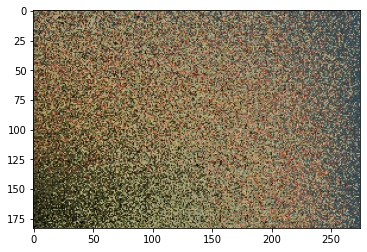

In [13]:
plt.imshow(enc_secret)

In [14]:
for i in range(row):
    for j in range (col):
        k=int(((abs(k3[i*col+j]+k4[i*col+j]+k5[i*col+j])*con)%8))
        
        s1='{0:08b}'.format(p1[i,j][0])
        #print(s)
        if (k%2==0):
            s11=s1[0:k]
            s12=s1[k:8]
            s1=s12+s11
        else:
            s11=s1[0:8-k]
            s12=s1[8-k:8]
            s1=s12+s11
        
        ################################
        
        s2='{0:08b}'.format(p1[i,j][1])
        #print(s)
        if (k%2==0):
            s21=s2[0:k]
            s22=s2[k:8]
            s2=s22+s21
        else:
            s21=s2[0:8-k]
            s22=s2[8-k:8]
            s2=s22+s21
            
        ###################################
        
        s3='{0:08b}'.format(p1[i,j][2])
        #print(s)
        if (k%2==0):
            s31=s3[0:k]
            s32=s3[k:8]
            s3=s32+s31
        else:
            s31=s3[0:8-k]
            s32=s3[8-k:8]
            s3=s32+s31

        p1[i,j]=(int(s1,2),int(s2,2),int(s3,2))

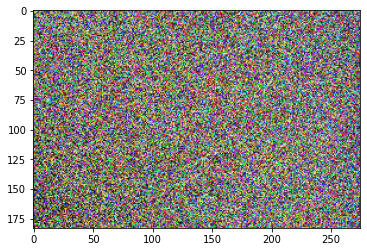

In [15]:
plt.imshow(enc_secret)

In [16]:
xs,x1,x2,x3,x4,x5,x6=[],[],[],[],[],[],[]

a=30
b = 10
c = 15.7
d = 5
e = 2.5
f = 4.45 
g = 38.5
x1.append(1.2356) 
x2.append(2.8905) 
x3.append(0.89648) 
x4.append(3.45797)
x5.append(0.45723) 
x6.append(3.2579)

xs.append(1.2356)
xs.append(2.8905)
xs.append(0.89648)
xs.append(3.45797)
xs.append(0.45723)
xs.append(3.2579)


x1.append((sum(xs)%1))
x2.append((x1[1]+x2[0])%1)
x3.append((x2[1]+x3[0])%1)
x4.append((x3[1]+x4[0])%1)
x5.append((x4[1]+x5[0])%1)

In [17]:
N1 =200+int((5*(sum(xs)-math.floor(sum(xs)))*con)%256)
N1

327

In [18]:
for i in range(2,N1+2):
    x1.append(round((a*(x2[i-1] - x1[i-1]) + x2[i-1]*x3[i-1]*x4[i-1])%1,8)) 
    x2.append(round((b*(x1[i-1] + x2[i-1]) + x5[i-1] - x1[i-1]*x3[i-1]*x4[i-1])%1,8)) 
    x3.append(round((-c*x2[i-1] - d*x3[i-1] - e*x4[i-1] + x1[i-1]*x2[i-1]*x4[i-1])%1,8)) 
    x4.append(round((-f*x4[i-1] + x1[i-1]*x2[i-1]*x3[i-1])%1,8)) 
    x5.append(round((-g*(x1[i-1] + x2[i-1]))%1,8)) 

In [19]:
w1,w2,w3,w4,w5=[],[],[],[],[]

w1.append(x1[-1])
w2.append(x2[-1])
w3.append(x3[-1])
w4.append(x4[-1])
w5.append(x5[-1])

for i in range(1,row*col*4*3):
    w1.append(round((a*(w2[i-1] - w1[i-1]) + w2[i-1]*w3[i-1]*w4[i-1])%1,8)) 
    w2.append(round((b*(w1[i-1] + w2[i-1]) + w5[i-1] - w1[i-1]*w3[i-1]*w4[i-1])%1,8)) 
    w3.append(round((-c*w2[i-1] - d*w3[i-1] - e*w4[i-1] + w1[i-1]*w2[i-1]*w4[i-1])%1,8)) 
    w4.append(round((-f*w4[i-1] + w1[i-1]*w2[i-1]*w3[i-1])%1,8)) 
    w5.append(round((-g*(w1[i-1] + w2[i-1]))%1,8)) 
    
a1,a2,a3,a4,a5=[],[],[],[],[]

for i in range(4*row*col*3):
        a1.append(int(((abs(w1[i])-math.floor(abs(w1[i])))*con)%8)) 
        #a2.append(int(((abs(w2[i])-math.floor(abs(w2[i])))*con)%256)) 
        a2.append(int(((abs(w2[i])-math.floor(abs(w2[i])))*con)%256)) 
        a3.append(int(((abs(w3[i])-math.floor(abs(w3[i])))*con)%6)) 
        a4.append(int(((abs(w4[i])-math.floor(abs(w4[i])))*con)%4)) 

In [20]:
### RULE TABLE
tab1=[['A','C','G','T'],['A','G','C','T'],['C','A','T','G'],['G','A','T','C'],['C','T','A','G'],['G','T','A','C'],
      ['T','C','G','A'],['T','G','C','A']]


### XOR TABLE

tab2=[['A','C','G','T'],['C','A','T','G'],['G','T','A','C'],['T','G','C','A']]

In [21]:
c1=[]
d1=[]

count=-1
for i in range(row):
    for j in range(col):
        for k in range(3):
            count=count+1
            
            p=p1[i,j][k]
            u='{0:08b}'.format(p)
            #print(u)
            u1=u[0:2]
            u2=u[2:4]
            u3=u[4:6]
            u4=u[6:8]
            
            #print(i*col+j*3+k)

            for x in (u1,u2,u3,u4):

                if x=='00':
                    c1.append(tab1[a1[count]][0])
                if x=='01':
                    c1.append(tab1[a1[count]][1])
                if x=='10':
                    c1.append(tab1[a1[count]][2])
                if x=='11':
                    c1.append(tab1[a1[count]][3])
                    
                #print(a1[count],h4[-1])
                    
            a=a2[count]
            v='{0:08b}'.format(a)
            v1=v[0:2]
            v2=v[2:4]
            v3=v[4:6]
            v4=v[6:8]


            for x in (v1,v2,v3,v4):
                if x=='00':
                    d1.append(tab1[a1[count]][0])
                if x=='01':
                    d1.append(tab1[a1[count]][1])
                if x=='10':
                    d1.append(tab1[a1[count]][2])
                if x=='11':
                    d1.append(tab1[a1[count]][3])
        
           
        ############################################################      
        
       

In [22]:
c11=[]
d11=[]

In [23]:

for i in range(row*col*4*3):
   
    if c1[i]=='A':
        c11.append('0')
    if c1[i]=='C':
        c11.append('1')
    if c1[i]=='G':
        c11.append('2')
    if c1[i]=='T':
        c11.append('3')

    if d1[i]=='A':
        d11.append('0')
    if d1[i]=='C':
        d11.append('1')
    if d1[i]=='G':
        d11.append('2')
    if d1[i]=='T':
        d11.append('3')

In [24]:
f1=[]

for i in range(row*col*4*3):
    f1.append(tab2[int(c11[i])][int(d11[i])])

In [25]:
############### complimentary rule
tab3=[['A','T','C','G'],['A','T','G','C'],['A','C','T','G'],['A','C','G','T'],['A','G','T','C'],['A','G','C','T']]

In [26]:
final=[]

for i in range(3*4*row*col):
    for j in range(4):
        if f1[i]==tab3[a3[i]][j]:
            break
       
    j=(j+a4[i])%4
    final.append(tab3[a3[i]][j])
    
    

In [27]:
final2=[]

for i in range(row*col*3):
    for j in range(4):
        
        if a1[i]==0:
            if final[i*4+j]=='A':
                final2.append('00')
            if final[i*4+j]=='C':
                final2.append('01')
            if final[i*4+j]=='G':
                final2.append('10')
            if final[i*4+j]=='T':
                final2.append('11')

        if a1[i]==1:
            if final[i*4+j]=='A':
                final2.append('00')
            if final[i*4+j]=='G':
                final2.append('01')
            if final[i*4+j]=='C':
                final2.append('10')
            if final[i*4+j]=='T':
                final2.append('11')

        if a1[i]==2:
            if final[i*4+j]=='C':
                final2.append('00')
            if final[i*4+j]=='A':
                final2.append('01')
            if final[i*4+j]=='T':
                final2.append('10')
            if final[i*4+j]=='G':
                final2.append('11')

        if a1[i]==3:
            if final[i*4+j]=='G':
                final2.append('00')
            if final[i*4+j]=='A':
                final2.append('01')
            if final[i*4+j]=='T':
                final2.append('10')
            if final[i*4+j]=='C':
                final2.append('11')

        if a1[i]==4:
            if final[i*4+j]=='C':
                final2.append('00')
            if final[i*4+j]=='T':
                final2.append('01')
            if final[i*4+j]=='A':
                final2.append('10')
            if final[i*4+j]=='G':
                final2.append('11')

        if a1[i]==5:
            if final[i*4+j]=='G':
                final2.append('00')
            if final[i*4+j]=='T':
                final2.append('01')
            if final[i*4+j]=='A':
                final2.append('10')
            if final[i*4+j]=='C':
                final2.append('11')

        if a1[i]==6:
            if final[i*4+j]=='T':
                final2.append('00')
            if final[i*4+j]=='C':
                final2.append('01')
            if final[i*4+j]=='G':
                final2.append('10')
            if final[i*4+j]=='A':
                final2.append('11')

        if a1[i]==7:
            if final[i*4+j]=='T':
                final2.append('00')
            if final[i*4+j]=='G':
                final2.append('01')
            if final[i*4+j]=='C':
                final2.append('10')
            if final[i*4+j]=='A':
                final2.append('11')

In [28]:
final3=[]

for i in range(row*col*3):
        final3.append(int((final2[4*i+0]+final2[4*i+1]+final2[4*i+2]+final2[4*i+3]),2))

In [29]:
count=0
for i in range(row):
    for j in range(col):
        p2[i,j]=(final3[count],  final3[count+1], final3[count+2]) 
        count=count+3

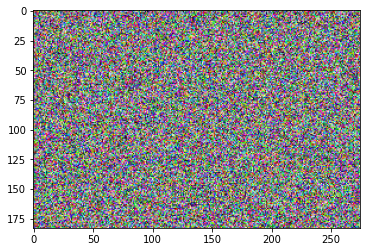

In [30]:
plt.imshow(img2)

In [31]:
plt.imsave('encrypted.jpg',img2)

In [32]:
p2=img2.load()
h1=[]

count=-1
for i in range(row):
    for j in range(col):
        for k in range(3):
            count=count+1
            p=p2[i,j][k]
            u='{0:08b}'.format(p)
            u1=u[0:2]
            u2=u[2:4]
            u3=u[4:6]
            u4=u[6:8]

            #print(count,final[count])
            for x in (u1,u2,u3,u4):
                if x=='00':
                    h1.append(tab1[a1[count]][0])
                if x=='01':
                    h1.append(tab1[a1[count]][1])
                if x=='10':
                    h1.append(tab1[a1[count]][2])
                if x=='11':
                    h1.append(tab1[a1[count]][3])
                
                #print(h1[-1])
                
                
        

In [33]:
h2=[]

tab4=[['G','C','T','A'],['C','G','T','A'],['G','T','C','A'],['T','G','C','A'],['C','T','G','A'],['T','C','G','A']]

In [34]:
for i in range(3*4*row*col):
    for j in range(4):
        if h1[i]==tab4[a3[i]][j]:
            break
    j=(j+a4[i])%4
    h2.append(tab4[a3[i]][j])
        

In [35]:
h3=[]

for i in range(row*col*4*3):
    if h2[i]=='A':
        h3.append('0')
    if h2[i]=='C':
        h3.append('1')
    if h2[i]=='G':
        h3.append('2')
    if h2[i]=='T':
        h3.append('3')

In [36]:
h4=[]

for i in range(row*col*4*3):
    h4.append(tab2[int(h3[i])][int(d11[i])])

In [37]:
h5=[]

for i in range(row*col*3):
    for j in range(4):
        
        if a1[i]==0:
            if h4[i*4+j]=='A':
                h5.append('00')
            if h4[i*4+j]=='C':
                h5.append('01')
            if h4[i*4+j]=='G':
                h5.append('10')
            if h4[i*4+j]=='T':
                h5.append('11')

        if a1[i]==1:
            if h4[i*4+j]=='A':
                h5.append('00')
            if h4[i*4+j]=='G':
                h5.append('01')
            if h4[i*4+j]=='C':
                h5.append('10')
            if h4[i*4+j]=='T':
                h5.append('11')

        if a1[i]==2:
            if h4[i*4+j]=='C':
                h5.append('00')
            if h4[i*4+j]=='A':
                h5.append('01')
            if h4[i*4+j]=='T':
                h5.append('10')
            if h4[i*4+j]=='G':
                h5.append('11')

        if a1[i]==3:
            if h4[i*4+j]=='G':
                h5.append('00')
            if h4[i*4+j]=='A':
                h5.append('01')
            if h4[i*4+j]=='T':
                h5.append('10')
            if h4[i*4+j]=='C':
                h5.append('11')

        if a1[i]==4:
            if h4[i*4+j]=='C':
                h5.append('00')
            if h4[i*4+j]=='T':
                h5.append('01')
            if h4[i*4+j]=='A':
                h5.append('10')
            if h4[i*4+j]=='G':
                h5.append('11')

        if a1[i]==5:
            if h4[i*4+j]=='G':
                h5.append('00')
            if h4[i*4+j]=='T':
                h5.append('01')
            if h4[i*4+j]=='A':
                h5.append('10')
            if h4[i*4+j]=='C':
                h5.append('11')

        if a1[i]==6:
            if h4[i*4+j]=='T':
                h5.append('00')
            if h4[i*4+j]=='C':
                h5.append('01')
            if h4[i*4+j]=='G':
                h5.append('10')
            if h4[i*4+j]=='A':
                h5.append('11')

        if a1[i]==7:
            if h4[i*4+j]=='T':
                h5.append('00')
            if h4[i*4+j]=='G':
                h5.append('01')
            if h4[i*4+j]=='C':
                h5.append('10')
            if h4[i*4+j]=='A':
                h5.append('11')

In [38]:
h6=[]
for i in range(row*col*3):
        h6.append(int((h5[4*i+0]+h5[4*i+1]+h5[4*i+2]+h5[4*i+3]),2))
       # print(h6[i],)
    
count=0
for i in range(row):
    for j in range(col):
        p3[i,j]=(h6[count], h6[count+1], h6[count+2])
        count=count+3
        #print(p3[i,j],p1[i,j])

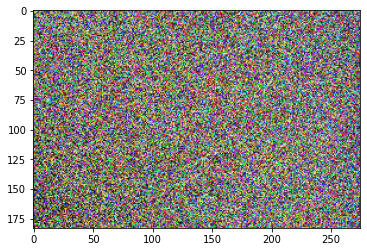

In [39]:
plt.imshow(img3)

In [40]:
img4=Image.new("RGB",(row,col),"black")
img5=Image.new("RGB",(row,col),"black")
p4=img4.load()
p5=img5.load()

In [41]:
for i in range(row):
    for j in range(col):
        v=int(((abs(k3[i*col+j]+k4[i*col+j]+k5[i*col+j])*con)%8))
        #v=int(((abs(k3[i*col+j])-math.floor(abs(k3[i*col+j])))*con)%8)
        #print(k)
        v1=v
        s1='{0:08b}'.format(p3[i,j][0])
        if (v%2==0):
            s11=s1[0:8-v1]
            s12=s1[8-v1:8]
            s1=s12+s11
            #print("hi")
        else:
            s11=s1[0:v1]
            s12=s1[v1:8]
            s1=s12+s11
            
        #####################################
        
        v1=v
        s2='{0:08b}'.format(p3[i,j][1])
        if (v%2==0):
            s21=s2[0:8-v1]
            s22=s2[8-v1:8]
            s2=s22+s21
            #print("hi")
        else:
            s21=s2[0:v1]
            s22=s2[v1:8]
            s2=s22+s21
        
        #########################################
        
        v1=v
        s3='{0:08b}'.format(p3[i,j][2])
        if (v%2==0):
            s31=s3[0:8-v1]
            s32=s3[8-v1:8]
            s3=s32+s31
            #print("hi")
        else:
            s31=s3[0:v1]
            s32=s3[v1:8]
            s3=s32+s31
            
       ##########################################
            #print("hi")
        p4[i,j]=(int(s1,2),int(s2,2),int(s3,2))
        

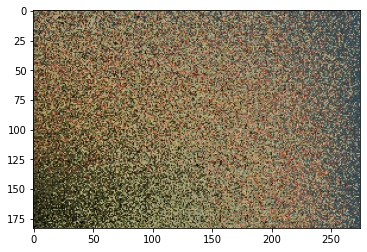

In [42]:
plt.imshow(img4)

In [43]:
for i in reversed(range(0,row)):
    for j in reversed(range(0,col)):
        i1=i+int(((abs(k1[i*col+j])- math.floor(abs(k1[i*col+j])))*con)%(row-i))
        j1=j+int(((abs(k2[i*col+j])- math.floor(abs(k2[i*col+j])))*con)%(col-j))
        z=p4[i1,j1]
        p4[i1,j1]=p4[i,j]
        p4[i,j]=z
        

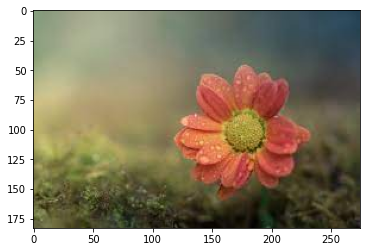

In [44]:
plt.imshow(img4)

In [45]:
plt.imsave('decrypted.jpg',img4)